# Gaussian Orbits

In this homework, we will use linear regression methods in order to determine the orbits of heavenly bodies.

### 0. Import a bunch of stuff!

Imports needed in this notebook: `numpy`, `matplotlib.pyplot`, from sklearn: `LinearRegression`, `ElasticNet`, and `mean_squared_error`

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error

### 1. Load in the data found in files `x.npy` and `y.npy`. 

Hint: `np.load`.

In [3]:
x = np.load('x.npy')
y = np.load('y.npy')

### 2. Use sklearn's LinearRegression

Without creating any features, try to fit a `LinearRegression` model to `x` and `y`. Print out the `mean_squared_error` you get.

Hint: You may get an error the first time you try to fit your model.

In [13]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
predictions = model.predict(x.reshape(-1, 1))
mean_squared_error(y, predictions)

0.65684799163192864

### 3. Experimentation time!

Try adding new features to your linear model by manipulating `x` and `y`! Print out the MSE of your model!

Hint: `np.vstack` may be useful here.

In [18]:
x2 = np.square(x)
x3 = x ** 3
X = np.vstack([x2, x3]).T

model_2 = LinearRegression()
model_2.fit(X, y)
predictions_2 = model_2.predict(X)
mean_squared_error(y, predictions_2)

0.64761521555494883

### 4. Fit a great model to our data!

Here's the secret: the `x` and `y` values we gave you are actually from an ellipse! Thinking about the form of an ellipse, fit a great model to our data :D Print out the MSE as usual.

Hint: Think about the features you need. (6 total)

Hint2: A common tactic is to add a column of all ones in order to add a bias term to your model.

Hint3: Use the normal equation instead of sklearn.

Hint4: `np` functions that we used (you may use some of these or none at all!):

- `np.linalg.inv`
- `np.dot`
- `np.eye`
- `np.ones`
- `np.square`
- `np.vstack`

Hint5: You may need to add an identity matrix (using `np.eye`) if all coefficients are 0.

In [19]:
# Features
x2 = np.square(x)
y2 = np.square(y)
xy = x*y
ones = np.ones(x.shape[0])
X = np.vstack([x2,xy,y2,x,y,ones]).T

# Solve [General Form] = 1
# and eventually subtract 1 from the intercept term
proj = np.linalg.inv(np.dot(X.T,X) + np.eye(6))
coeff = np.dot(np.dot(proj,X.T),ones)
print('MSE: {}'.format(np.linalg.norm(np.dot(X, coeff) - ones)))

MSE: 0.26192231124710463


### 5. Evaluate your model!

Have the coefficients in a list/np.array of size 6 called `coeff`. Run the code block below. If you see an ellipse of blue points with a black outline, you've done it! If not, go back to step 4 and keep improving your model! You got this :D

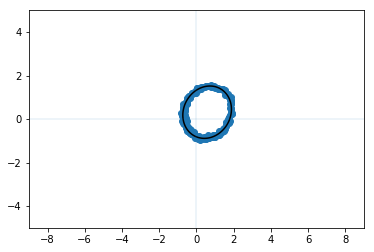

In [20]:
xv = np.linspace(-9, 9, 400)
yv = np.linspace(-5, 5, 400)
xv, yv = np.meshgrid(xv, yv)

def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)

axes()
plt.contour(xv, yv, xv*xv*coeff[0] + xv*yv*coeff[1] + yv*yv*coeff[2] + xv*coeff[3] + yv*coeff[4] + coeff[5] - 1, [0], colors='k')
plt.scatter(x,y)
plt.show()

### 6. Try other features

Try adding cubic terms into your model. This time, use `ElasticNet` from sklearn. Print out the model coefficients and the MSE.

In [21]:
# features
x2 = np.square(x)
y2 = np.square(y)
x3 = np.power(x, 3)
y3 = np.power(y, 3)
xxy = np.square(x)*y
xyy = np.square(y)*x
xy = x*y
ones = np.ones(x.shape[0])

model = ElasticNet(fit_intercept=False, l1_ratio=.23, alpha=.01)

X = np.vstack([x2,xy,y2,x,y,ones, x3,y3,xxy,xyy]).T
zeros = np.zeros(x.shape[0])

model.fit(X, ones)

coeff = model.coef_
print(coeff)
print('MSE: {}'.format(np.linalg.norm(np.dot(X, coeff) - ones)))

[ 0.04470977 -0.0081059   0.0546247  -0.04341558 -0.02384313  0.93154563
 -0.         -0.         -0.00115408 -0.        ]
MSE: 0.18881562800799595


### 7. Observations on Coefficients

[Free Response] 
1. What do you notice about your coefficients for this model? 
2. Why do you think this is the case? 
3. Why does this model have a lower MSE than our previous one? Does this mean that this is a better model?

1. The coefficients for the cubic terms are very close to 0.
2. I think this is the case because an ellipse does not actually have any cubic terms in it.
3. This model has more expressive power because we gave it more terms and therefore more parameters. No, this is not necessarily a better model because we know the true form of an ellipse does not have any cubic terms in it. This model is probably worse at generalizing but better at fitting the training data.

### 8. Evaluate this model!

Run this code block below. This code block assumes that you have an array called `coeff` which has  10 elements.

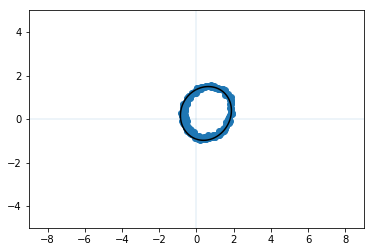

In [22]:
xv = np.linspace(-9, 9, 400)
yv = np.linspace(-5, 5, 400)
xv, yv = np.meshgrid(xv, yv)

def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)

axes()
plt.contour(xv, yv, xv*xv*coeff[0] + xv*yv*coeff[1] + yv*yv*coeff[2] + xv*coeff[3] + yv*coeff[4] + coeff[5] - 1 + coeff[6]*xv*xv*xv + coeff[7]*yv*yv*yv + coeff[8]*xv*xv*yv + coeff[9]*xv*yv*yv , [0], colors='k')
plt.scatter(x,y)
plt.show()